In [2]:
#Here we implement method to smash a 2Dx2D hamatonian to a smaller H such state ony effect of lower eigenvalue are acounter in that
#import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as cp
import numpy as np
import scipy as sp
import scipy.special as sps

'''Declearning Constand and Inputs =================='''
t1= time.time()
# Constants (all MKS, except energy which is in eV)
hbar = 1.06e-34
q = 1.6e-19
IE = (q*q) / (2 * cp.pi * hbar)
Ef = 2.25
kT = 0.025
Ecc = 3.02

#Effective mass in lattice for insulator and ferromagnet
mc = 0.18*9.1e-31
mf = 0.8*9.1e-31

# Inpupt a =size of lattice
a = 0.25e-10
Nr = 1000 #Number of point in radial direction
rad = 15*1e-9 #Radius

#t0, tm are values of t in channel and magnet repectivily (NOTE:for now we have asumme energy Ec is same in both)
t0 = (hbar**2) / (2 * mc * (a**2) * q)
tm = (hbar**2) / (2 * mf * (a**2) * q)


In [3]:
'''Creating a function that will find all of the eigenvalues less than thrushold'''
Th = 2 #Thrushold energy level
Eng = [] # List of energy

lim = 35 #max value of m that need to be check
maxm = 70 #maximum number of eigenvalues per M
perM = np.zeros(lim) #List of how many energy is contributing per angular momentum m
perMd = np.zeros(lim)
P = np.zeros(maxm)

for i in range(lim):
    P = sps.jn_zeros(i,maxm)
    for j in range(maxm):
        Et = ((P[j]*hbar)**2) / (2 * mf * ((rad)**2) * q)
        if Et<Th:
            Eng.append(Et)
            perMd[i]=(j+1)
            if i!=0:
                Eng.append(Et)
                perM[i]=2*(j+1)
            else:
                perM[i]=j+1

tild = np.zeros(lim)
for i in range(lim):
    tild[i] = int(np.sum(perM[:i]))
leng = len(Eng)
lengd  = int(np.sum(perMd))
print(leng)

1556


In [4]:
AA = range(leng)
BB,CC = sore(Eng,AA)

NameError: name 'sore' is not defined

In [5]:
plt.plot(BB)

NameError: name 'BB' is not defined

In [6]:
def block_Unit(m,me,nz):
    '''This function find the block crossponding to each component of m for Unit_R'''
    '''m is azu quntum no, me is no of eigenvalues contributing, nz is texture'''
    P = sps.jn_zeros(m,me) #Zeros of bessel's function
    En = ((P*hbar)**2) / (2 * mf * ((rad)**2) * q) #Energy crossponding to these
    X = np.linspace(0,1,Nr) #Grid from 0 to 1
    phi = np.zeros((Nr,me)) #To store eigenvector
    #Extractin crossponding eigenvector
    for i in range(me):
        gri = P[i]*X
        vect = sps.jv(m,gri) #Eigenvector corrosponding to eigenvalue
        nor = np.trapz(vect*vect*X) #finding the norm
        phi[:,i]=sps.jv(m,gri)/(nor**(1/2)) #Storing normalized vector
    
    #Contructing Unitary transformation
    Unit = np.zeros((me,me))
    for i in range(me):
        for j in range(me):
            Unit[i,j] = np.trapz(nz*phi[:,i]*phi[:,j]*X)
        
    
    return Unit


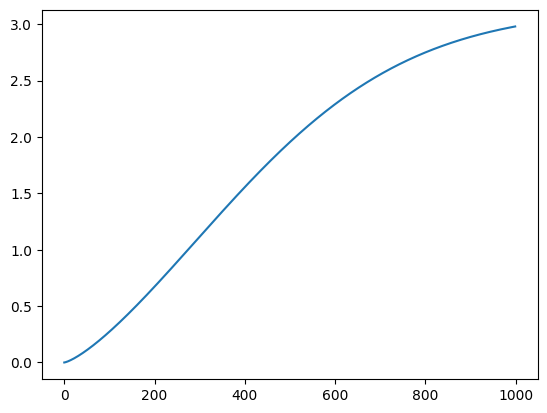

In [7]:
X = np.linspace(0,0.55,Nr)
delt = np.pi*(2/(1+np.exp(-8*X**(1.32)))-1)
plt.plot(delt)

In [8]:
def Offblock(i,j,ni,nj,nx):
    '''This function find out the inner product of wave functin which have different m(ignoring complex part)
    i,j are the value of m for both and ni,nj are no of there state we are considering. nx is texture along radial dirtion'''
    
    X = np.linspace(0,1,Nr)
    Z0 = sps.jn_zeros(i,ni)
    Z1 = sps.jn_zeros(j,nj)
    Unit = np.zeros((ni,nj))
    for k in range(ni):
        for l in range(nj):
            #First eigenvalue
            phi = sps.jv(i,Z0[k]*X)
            nor1 = np.trapz(phi*phi*X)
            #Second eigenvalue
            phi = phi/(nor1**(1/2))
            phi2 = sps.jv(j,Z1[l]*X)
            nor2 = np.trapz(phi2*phi2*X)
            phi2=phi2/(nor2**(1/2))
            dot = np.trapz(nx*phi*phi2*X)
            Unit[k,l] = dot
    
    return Unit

In [9]:
#Contructing a full Unit_R and eigenvalue matrix
#Number of Eigenvalue we are interested
delta = 2.15 #stoner's spliting


#Magnetic Texture
nx = np.cos(delt/2) #Texture
nz = np.sin(delt/2)


theta = 0 #Angle relative to radial
intr = leng
Unit_R = np.zeros((2*intr,2*intr),dtype=complex) #Unitry transformation
Eig = np.zeros(2*intr) #To store eigenvalules
co = 0 #count number eigenvalues has been used

#Finding the uu and dd compoenet of matrix
for i in range(lim):
    t = int(perMd[i]) #amount of eigenvalue contribute for each m
    if t==0:
        break
    if i==0:
        Z= block_Unit(i,t,nz)
        Unit_R[co:co+t,co:co+t]= Z
        Unit_R[intr+co:intr+co+t,intr+co:intr+co+t]= Z
        #Storing Eigenvalues
        P = sps.jn_zeros(i,t) #Zeros of bessel's function
        temp = ((P*hbar)**2) / (2 * mf * ((rad)**2) * q) #Energy crossponding to these
        Eig[co:co+t] = temp
        Eig[intr+co:intr+t+co] = temp+delta
        
    else:
        Z= block_Unit(i,t,nz)
        Unit_R[co:co+t,co:co+t]= Z
        Unit_R[intr+co:intr+co+t,intr+co:intr+co+t]= Z
        #Storing Eigenvalues
        P = sps.jn_zeros(i,t) #Zeros of bessel's function
        temp = ((P*hbar)**2) / (2 * mf * ((rad)**2) * q) #Energy crossponding to these
        Eig[co:co+t] = temp
        Eig[intr+co:intr+t+co] = temp+delta
        
        co+=t
        
        Z= block_Unit(i,t,nz)
        Unit_R[co:co+t,co:co+t]= Z
        Unit_R[intr+co:intr+co+t,intr+co:intr+co+t]= Z
        #Storing Eigenvalues
        P = sps.jn_zeros(i,t) #Zeros of bessel's function
        temp = ((P*hbar)**2) / (2 * mf * ((rad)**2) * q) #Energy crossponding to these
        Eig[co:co+t] = temp
        Eig[intr+co:intr+t+co] = temp+delta
    co+=t
    

    



#finding ud and du
cor=int(perM[0])
col=int(0)
#For positive m

for k in range(1,lim):
    #value of m for left and right contact's eigenvalues
    lt = int(perMd[k-1])
    rt = int(perMd[k])
    if rt==0:
        #Stop if all compoenet under thrushold is taken into acount
        break
    
    Z = Offblock(k-1,k,lt,rt,nx)
    Unit_R[col:col+lt,intr+cor:intr+cor+rt]=Z
    if k==1:
        Unit_R[cor+rt:cor+2*rt,intr+col:intr+col+lt]=Z.T
    else:
        Unit_R[cor+rt:cor+2*rt,intr+col+lt:intr+col+2*lt]=Z.T
    
    cor+=int(perM[k])
    col+=int(perM[k-1])
    
Unit_R[intr:,:intr] = -np.conj(Unit_R[:intr,intr:].T)


#Unitt_L
th=np.pi/2
rot = np.array([[np.cos(th/2),np.sin(th/2)],[-np.sin(th/2),np.cos(th/2)]])

Unit_L = np.kron(rot,np.eye(intr)) 


'''Contructing Relevent Hamaltonain'''
#Channel
EigT = np.zeros(2*intr)
EigT[:intr] = Eig[:intr]
EigT[intr:] = Eig[:intr]
EigT = (mf/mc)*EigT

#Left contact
Eig_L = np.zeros(2*intr)
Eig_L[:intr] = Eig[:intr]
Eig_L[intr:] = Eig[:intr]  + delta#Increasing in energy of up spin due to ferromagnet

#Right contact
Eig_R = np.zeros(2*intr)
Eig_R[:intr] = Eig[:intr]
Eig_R[intr:] = Eig[:intr] + delta

#Channel and left contact have same eigenspace but we have to transform right contact to the basis of left contact
T_trans = np.diag(EigT+2*t0)
TL = np.diag(Eig_L+2*tm)
TL = Unit_L@TL@np.conj(Unit_L.T)
TR = np.zeros((2*intr,2*intr),dtype=complex)
TR = np.diag(Eig_R+2*tm)
TR = Unit_R@TR@np.conj(Unit_R.T)


In [10]:
UnitRR = np.zeros((2*leng,2*leng))
for i in range(leng):
    for j in range(leng):
        twotwo = np.array([[abs(Unit_R[i,j]),abs(Unit_R[leng+i,j])],[abs(Unit_R[i,leng+j]),abs(Unit_R[leng+i,leng+j])]])
        UnitRR[2*i:2*i+2,2*j:2*j+2] = twotwo 


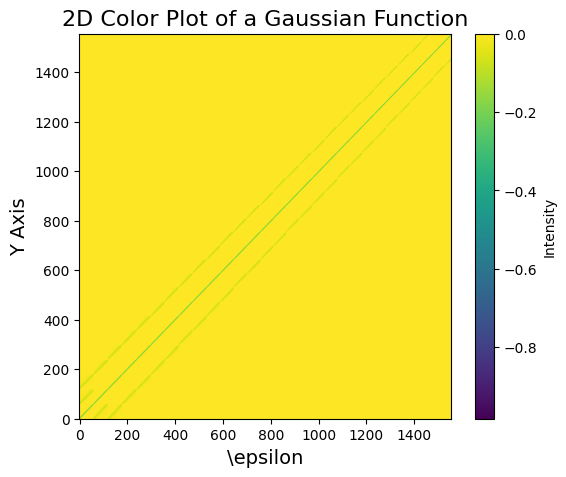

In [11]:
import matplotlib.pyplot as plt

Z = -abs(UnitRR[:leng,:leng])

# Create the plot
plt.figure(figsize=(6, 5))
plt.imshow(Z, origin='lower', cmap='viridis', aspect='auto')

# Add a color bar
plt.colorbar(label='Intensity')

# Add labels and title
plt.xlabel('\epsilon', fontsize=14)
plt.ylabel('Y Axis', fontsize=14)
plt.title('2D Color Plot of a Gaussian Function', fontsize=16)

# Save the figure as a high-resolution PNG file
#plt.savefig('2D_color_plot.png', dpi=300)

# Show the plot
plt.show()


In [12]:
print(np.sum(Unit_R[0]*Unit_R[0]))

(0.9996032818068813+0j)


In [13]:
def sore(A, B):
    """
    Sorts array A and rearranges array B based on the order of A.

    Parameters:
    A (list): The array to be sorted.
    B (list): The array to be rearranged based on the sorted order of A.

    Returns:
    tuple: Two lists, the sorted A and the rearranged B.
    """
    # Combine A and B into a list of tuples
    combined = list(zip(A, B))
    
    # Sort the combined list based on the elements of A
    combined.sort()
    
    # Unzip the sorted combined list into sorted_A and rearranged_B
    sorted_A, rearranged_B = zip(*combined)
    
    return list(sorted_A), list(rearranged_B)

In [14]:
AA = range(leng)
BB,CC = sore(Eng,AA)

UnitRRR = np.zeros((2*leng,2*leng))
for i in range(leng):
    ii = CC[i]
    for j in range(leng):
        jj=CC[j]
        twotwo = np.array([[abs(Unit_R[ii,jj]),abs(Unit_R[leng+ii,jj])],[abs(Unit_R[ii,leng+jj]),abs(Unit_R[leng+ii,leng+jj])]])
        UnitRRR[2*i:2*i+2,2*j:2*j+2] = twotwo 

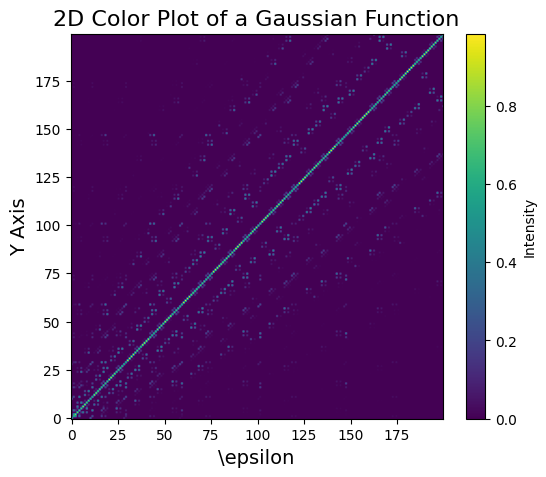

In [15]:
Z = abs(UnitRRR[:200,:200])

# Create the plot
plt.figure(figsize=(6, 5))
plt.imshow(Z, origin='lower', cmap='viridis', aspect='auto')

# Add a color bar
plt.colorbar(label='Intensity')

# Add labels and title
plt.xlabel('\epsilon', fontsize=14)
plt.ylabel('Y Axis', fontsize=14)
plt.title('2D Color Plot of a Gaussian Function', fontsize=16)

# Save the figure as a high-resolution PNG file
#plt.savefig('2D_color_plot.png', dpi=300)

# Show the plot
plt.show()

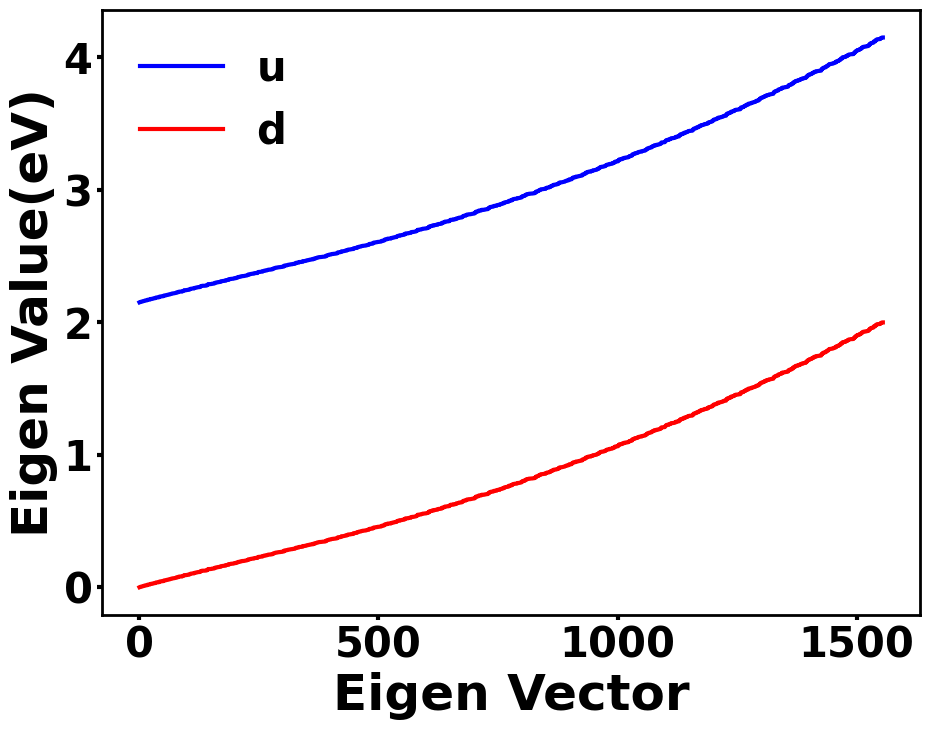

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Load your data
I_anti = BB
I_par = np.array(BB)+2.15

x = range(leng)
y2 = I_anti
y1 = I_par

# Configure font settings
plt.rcParams['font.weight'] = 'bold'
plt.rcParams.update({'font.size': 30})

# Create a figure with a white background
fig = plt.figure(figsize=(10, 8))
fig.patch.set_facecolor('white')

# Plot the data and set line properties
cp, = plt.plot(x, y1, label='d', color='b', linewidth=3)
cn, = plt.plot(x, y2, label='u', color='r', linewidth=3, zorder=3)

# Set labels and title
plt.xlabel('Eigen Vector', fontweight='bold', fontsize=36)
plt.ylabel('Eigen Value(eV)', fontweight='bold', fontsize=36)

# Set custom axis limits and tick positions
x_min, x_max = 0, 50
y_min, y_max = 0, 10
x_ticks = [-0.2, -0.1, 0, 0.1, 0.2]
y_ticks = [-40, -20, 0,20, 40]

#plt.xticks(x_ticks)
#plt.yticks(y_ticks)
#plt.xlim(x_min, x_max)
#plt.ylim(y_min, y_max)

# Create a legend without a box outline
lgd = plt.legend([cp, cn], ['u', 'd'])
lgd.set_frame_on(False)

# Customize tick parameters and spines
plt.gca().tick_params(axis='both', which='major', width=3)
plt.gca().spines['top'].set_linewidth(2)
plt.gca().spines['bottom'].set_linewidth(2)
plt.gca().spines['left'].set_linewidth(2)
plt.gca().spines['right'].set_linewidth(2)

plt.tight_layout()
plt.savefig('Eig3D.png')

# Show the plot
plt.show()
